In [1]:
import os
import sys
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def cellintensity(filename):
    path1 =  r'C:/WorkStudy/mNG_Clover_paper/20190916/Analysis/Mask/'
    FITC_R = filename + "-2_FITC_Results.csv"
    FITC_B = filename + "-2_FITC_background.csv"
    Excel = pd.read_csv(path1 + FITC_R)
    Background = pd.read_csv(path1 + FITC_B)
    
    #Get the total number of rows to clean up the summary data at the end of csv.Only keep 6%~95% volue
    a = Excel.shape[0]
    index1 = int(0.05*(a-4))
    index2 = int(0.95*(a-4)+1)
    Excel2 = Excel.sort_values("Median")
    Excel2.reset_index(inplace=True, drop=True)
    data = Excel2.iloc[index1:index2,:]
    
    
    #use median of each cell to represent the overall intensity，substract background
    Intensity = data[["Median"]]
    b = Background.Median.iloc[0]
    Substract_background = Excel.Median.apply(lambda x : x-b )
    Intensity["subbg"] = Substract_background.copy()
    
    #plot histogram
    plt.hist(Intensity.subbg, bins=200, log = True)
    plt.title(filename)

<ipython-input-2-795604e0f74c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intensity["subbg"] = Substract_background.copy()


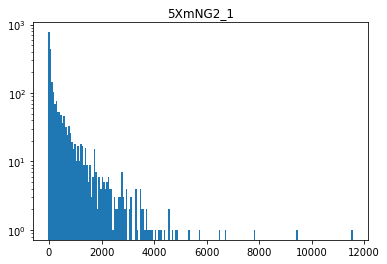

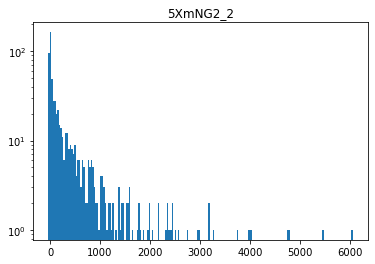

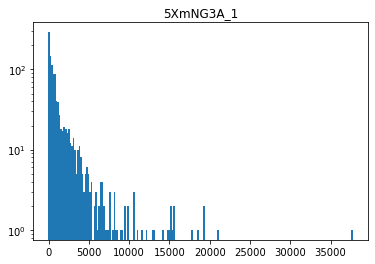

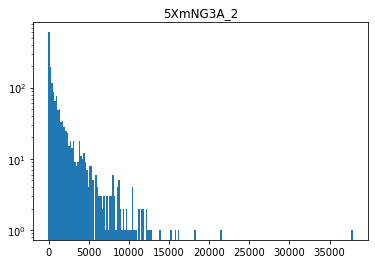

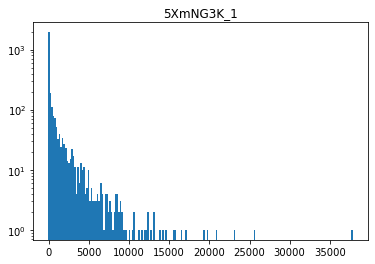

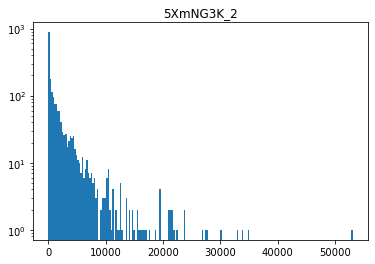

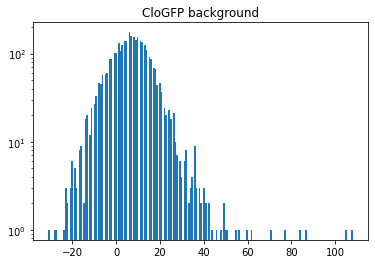

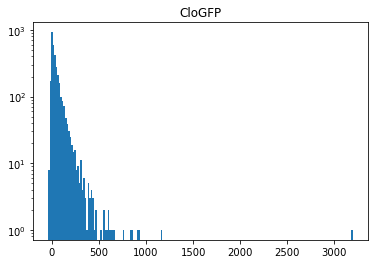

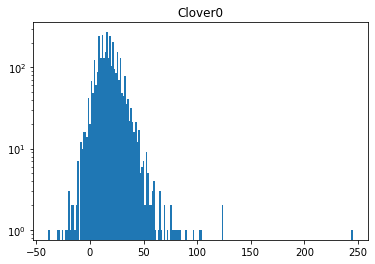

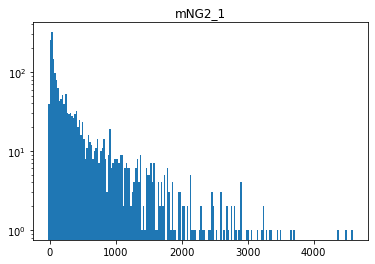

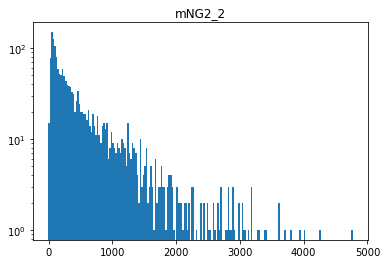

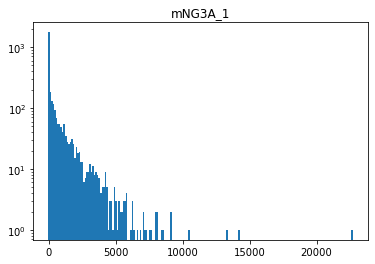

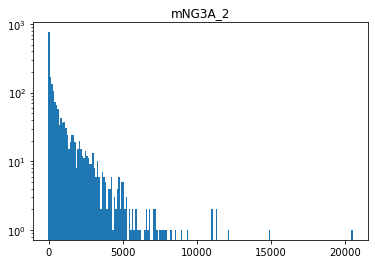

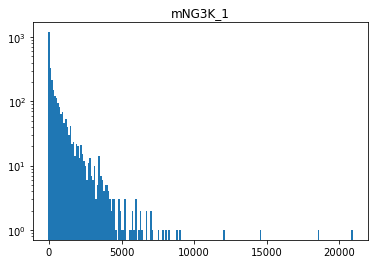

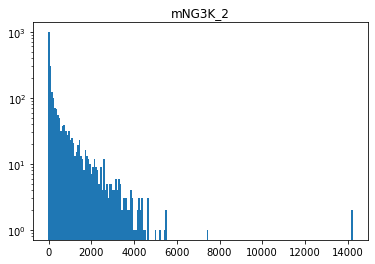

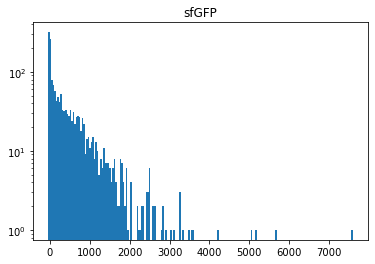

In [3]:
path2 = r'C:\WorkStudy\mNG_Clover_paper\20190916\Analysis\Images of average'
for file in os.listdir(path2):
    fig, axs = plt.subplots()
    current = os.path.splitext(file)[0]
    cellintensity(current)